In [110]:
#EXERCICI 1 EXERCICI 2  EXERCICI 4
#Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.
#Compara’ls en base al MSE i al R2.
##Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

df=pd.read_csv('C:\\Users\client277192\\Documents\\01-IT ACADEMY. DATA SCIENCE\\Test Hipotesis and Machine Learning\\M5\\housing data.csv')
df.columns=['CRIM', 'ZN','INDUS','CHAS','NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']   
df.head()        

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


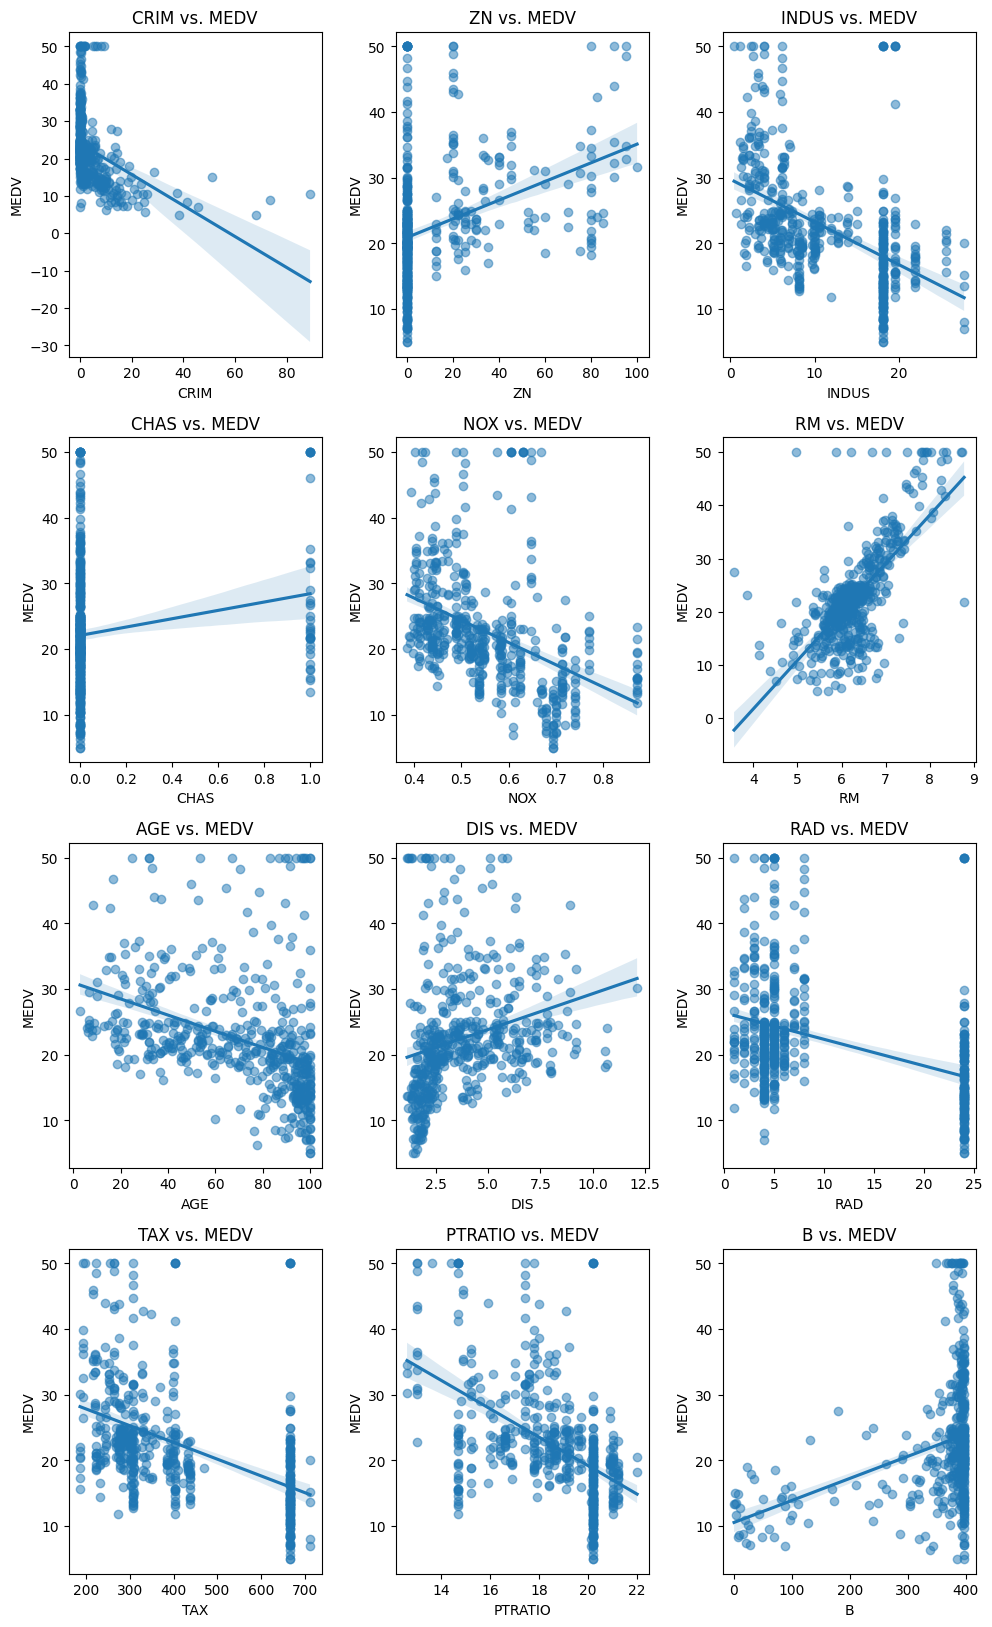

In [113]:
#Miro en un grafico de puntos la relación que tienen las variables con MEDV. No parecen muy relacionadas. RM es la que mas

variables_ind= ['CRIM', 'ZN','INDUS','CHAS','NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PTRATIO', 'B', 'LSTAT']
n_filas=5
n_columnas=3

fig, axes = plt.subplots(nrows=n_filas, ncols=n_columnas, figsize=(10, 20))
axes = axes.flatten()

for i, variable in enumerate(variables_ind[:-1]):
    sns.regplot(x=df[variable], y=df['MEDV'], ax=axes[i], scatter_kws={'alpha':0.5})
    axes[i].set_title(f'{variable} vs. MEDV')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('MEDV')

#elimino los graficos vacios

for j in range(len(variables_ind) - 1, n_filas * n_columnas):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

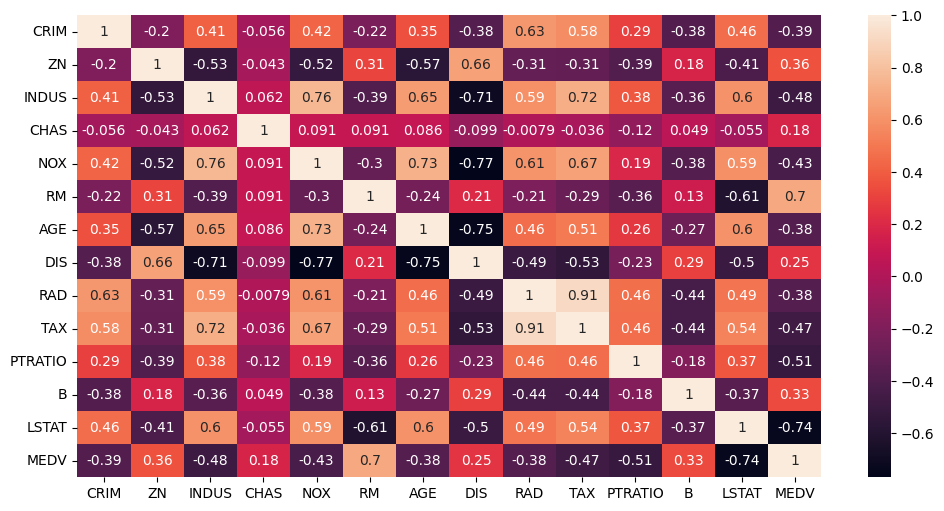

In [114]:
#MIRO LAS CORRELACIONES QUE HAY ENTRE LAS VARIABLES para ver cuales escojo para el modelo

import seaborn as sns
plt.figure(figsize=(12,6))
graf1= sns.heatmap(df.corr(), annot=True)

In [115]:
#Miro los estadisticos para escoger variables

import statsmodels.api as sm

x= df[['CRIM', 'ZN','NOX','RM', 'DIS','RAD','TAX','PTRATIO', 'B', 'LSTAT']]      
y= df ['MEDV']

x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     137.9
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          5.26e-136
Time:                        19:00:02   Log-Likelihood:                -1500.6
No. Observations:                 505   AIC:                             3023.
Df Residuals:                     494   BIC:                             3070.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8226      5.111      7.204      0.0

A mas bajo estatus la media de la vivienda es mas barata


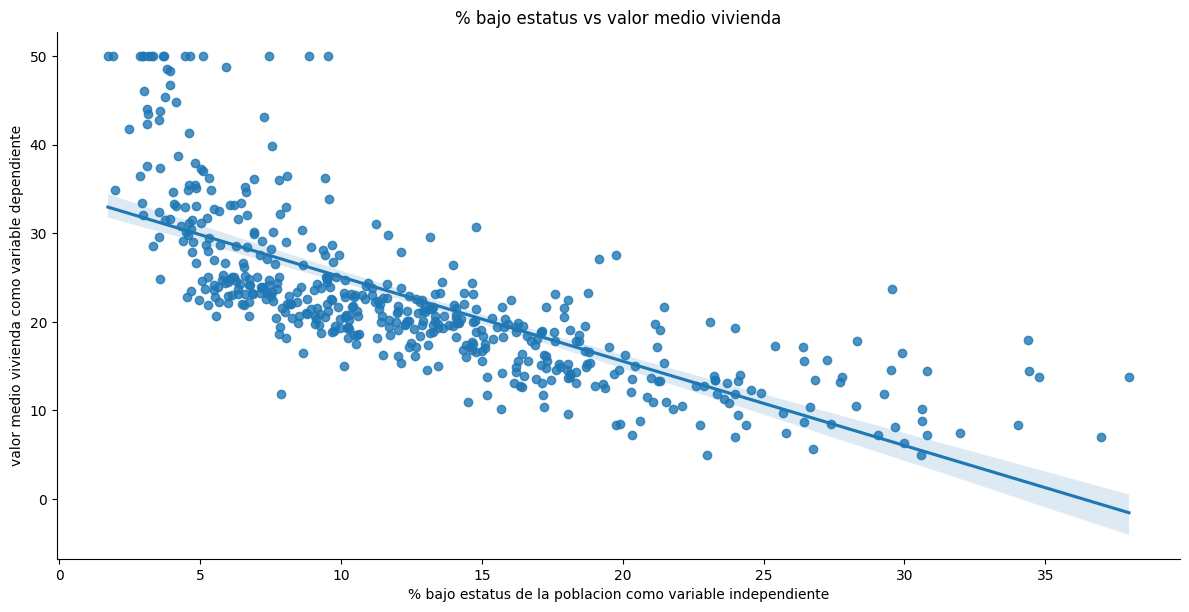

In [116]:
#el grafico de la mejor correlación es el siguiente

sns.lmplot(x='LSTAT', y='MEDV', data=df, aspect=2, height=6)
plt.xlabel ('% bajo estatus de la poblacion como variable independiente')
plt.ylabel('valor medio vivienda como variable dependiente')
plt.title('% bajo estatus vs valor medio vivienda')
print('A mas bajo estatus la media de la vivienda es mas barata')

In [117]:
# Voy a hacer dos modelos de regresion, uno lineal multiple con LSTAT y DIS ya que estas dos caracteristicas tienen 
# una mayor correlación lineal y un modelo Gradient Boosting que trabaja bien con relaciones no lineales


In [118]:
#nuevo dataframe para el modelo lineal multiple
data=df.drop(['CRIM', 'ZN','INDUS','CHAS','NOX', 'RM', 'AGE', 'RAD','TAX','PTRATIO', 'B'], axis=1)
data.describe()

,DIS,LSTAT,MEDV
count,505.000000,505.000000,505.000000
mean,3.794459,12.668257,22.529901
std,2.107757,7.139950,9.205991
min,1.129600,1.730000,5.000000
25%,2.100000,7.010000,17.000000
50%,3.199200,11.380000,21.200000
75%,5.211900,16.960000,25.000000
max,12.126500,37.970000,50.000000


In [119]:
#CREO MODELO DE REGRESION LINEAL MULTIPLE

In [120]:
#Voy a emplear el train/test para un mejor resultado. Divido los datos en dependientes y, y los independientes X

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x=data[['LSTAT', 'DIS']]
y=data['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=30)

In [121]:
#creo la regresion lineal multiple

modelo_lineal=LinearRegression()

#entreno el modelo
modelo_lineal.fit(x_train,y_train)

LinearRegression()

In [122]:

y_prediccion= modelo_lineal.predict (x_test)


In [123]:
#VALIDEZ DEL MODELO LINEAL

r2 = r2_score(y_test, y_prediccion)
mse = mean_squared_error(y_test, y_prediccion)

print(f'el r2 es: {r2}, es mas fiable si es cercano a 1')
print(f'el mse es: {mse}, es mejor si es  bajo')

el r2 es: 0.42836107542218405, es mas fiable si es cercano a 1
el mse es: 32.90309492290009, es mejor si es  bajo


In [124]:
#CREO EL MODELO DE GRADIEST BOOSTING REGRESSION ya que funciona bien para variables no lineales

In [125]:
from sklearn.ensemble import GradientBoostingRegressor

x=df[['CRIM', 'ZN','INDUS','CHAS','NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PTRATIO', 'B', 'LSTAT']]
y=df['MEDV']

In [126]:
#divido los datos de test y entrenamiento

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [127]:
#creo el modelo

gradient_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [128]:
gradient_model.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [129]:
#realizo predicciones

y_pred= gradient_model.predict(x_test)

In [130]:
#Validez del modelo

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'el r2 es: {r2}, es mas fiable si es cercano a 1')
print(f'el mse es: {mse}, es mejor si es  bajo')


el r2 es: 0.9079497944010968, es mas fiable si es cercano a 1
el mse es: 5.12923597616726, es mejor si es  bajo


In [131]:
# sin ninguna duda la validez del modelo de Gradient Boosting es mucho mejor que la lineal multiple

In [132]:
#EXERCICI 3 

#Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.
#Aplico el GridSearchCV per millorar la prediccio

from sklearn.model_selection import GridSearchCV

# Aplico GridSearchCV para intenter mejorar la predicción en los dos modelos

modelo_lineal=LinearRegression()
modelo_gradient=GradientBoostingRegressor()


#defino los parametros a explorar en cada modelo

parametros_lineal={'fit_intercept':[True, False]}   #determina si se debe calcular la interseccion. True es que si

parametros_gradient= {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
                   

#Creo el GridSearchCV. explora diferentes combinaciones de parametros , ajusta el modelo a la mejor combinación basada en metrica de evaluación (neg_mean_squared_error).

grid_lineal=GridSearchCV(modelo_lineal, parametros_lineal, scoring='neg_mean_squared_error', cv=5) #modelo lineal es lo que ajustamos. parametros es lo que se probara en el modelo. meg_mean.... minimiza el error cuadratico medio
grid_gradient = GridSearchCV(modelo_gradient, parametros_gradient, scoring='neg_mean_squared_error', cv=5)

#ajusto el modelo. Se exploran las cominaciones de parametros definidas previamente(parametro lineal y lasso) utilizando la validación cruzada
#luego se seleccionan los mejores parametros segun 'neg_mean_squared_error'

grid_lineal.fit(x_train, y_train)   #fit ajusta el modelo grid_lineal a los datos de entrenamiento X_train, y_train
grid_gradient.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [133]:
#obtento los mejores modelos. 

mejor_modelo_lineal = grid_lineal.best_estimator_       #modelo que tiene el mejor estimado o rdo.
mejor_modelo_gradient = grid_gradient.best_estimator_


In [134]:
#hago las predicciones

predicciones_lineal = mejor_modelo_lineal.predict(x_test)
predicciones_gradient = mejor_modelo_gradient.predict(x_test)



In [136]:
#MIRO LA FIABILIDAD DE LOS MODELOS ENTRENADOS

mse_lineal = mean_squared_error(y_test, predicciones_lineal)
r2_lineal = r2_score(y_test, predicciones_lineal)

mse_gradient = mean_squared_error(y_test, predicciones_gradient)
r2_gradient = r2_score(y_test, predicciones_gradient)

print(f'el R2 del modelo lineal es {r2_lineal}, cuanto mas cercano a 1, mas fiable')
print(f'el MSE del modelo lineal es {mse_lineal}, cuanto mas bajo, mas fiable es el modelo')

print(f'el R2 del modelo lasso es {r2_gradient}')
print(f'el MSE del modelo lasso es {mse_gradient}')


el R2 del modelo lineal es 0.6522201888666173, cuanto mas cercano a 1, mas fiable
el MSE del modelo lineal es 19.37904111613691, cuanto mas bajo, mas fiable es el modelo
el R2 del modelo lasso es 0.9097744229679017
el MSE del modelo lasso es 5.027563737337302


In [ ]:
#Como conclusión: en el modelo lineal, aplicar el GridSearch sí ha mejorado notablemente la validez del modelo.
#Lineal: r2=0.43, mse=32.903 aplicando GridSearch: r2=0.65, mse=19.37

#en el modelo Gradiest también ha habido una mejora pero mucho menor. 
# Gradiest: r2=0.9079, mse=5.129, aplicando GridSearch: r2=0.909, mse=5.027
